<a href="https://colab.research.google.com/github/intsoo/WebServer_1/blob/main/HW1_1(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2022-1 Artificial Intelligence (01)
## Homework #1: MLP from the scratch
---
Copyright (c) Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

Ewha Womans University

In [86]:
import numpy as np

In [87]:
# Sigmoid function
def sigmoid(x):
  # Problem 1.(a): fill here
  result = 1.0 / (1.0 + np.exp((-1)*x))
  return result

# Derivative of sigmoid function
def dsigmoid(x):
  # Problem 1.(a): fill here
  sigmoidX = sigmoid(x)
  result = sigmoidX * (1 - sigmoidX)
  return result

# Hyperbolic tangent function
def tanh(x):
  # Problem 1.(a): fill here
  result = np.tanh(x)
  return result

# Derivative of hyperbolic tangent function
def dtanh(x):
  # Problem 1.(a): fill here
  result = 1 - tanh(x) ** 2
  return result

In [88]:
# Mean squared error function
def MSE(O, T):  # O = self.predict()
  # Problem 1.(b): fill here
  result = 0
  size = np.size(O)
  result = (1/size) * (O-T) ** 2
  return np.sum(result)

# Derivative of hyperbolic tangent function
def dMSE(O, T):
  # Problem 1.(b): fill here
  result = O-T
  return result

In [89]:
class MLP:

  def __init__(self, learning_rate=0.035, n_epochs=100000, n_inputs=2, n_hiddens=2, n_outputs=1):
    self.lr = learning_rate
    self.n_epochs = n_epochs
    
    self.n_inputs = n_inputs
    self.n_hiddens = n_hiddens
    self.n_outputs = n_outputs

    self.first_layer_activation_func = tanh
    self.first_layer_dactivation_func = dtanh
    self.second_layer_activation_func = sigmoid
    self.second_layer_dactivation_func = dsigmoid
    self.loss_func = MSE
    self.dloss_func = dMSE
    self.first_layer_weights = None
    self.first_layer_bias = None
    self.second_layer_weights = None
    self.second_layer_bias = None
  

  def _init_params(self):
    # Problem 1.(c): fill here
  
    self.first_layer_weights = np.reshape(np.random.random(4), (2, 2))  # 2x2 random matrix
    self.first_layer_bias = np.array([[0.0, 0.0]])
    #self.first_layer_bias = np.reshape(np.random.random(2), (1, 2))
    
    self.second_layer_weights = np.reshape(np.random.random(2), (2, 1))
    self.second_layer_bias = np.array([[0.]])


  def _forward(self, X, T):
    # Problem 1.(d): fill here
    X = np.atleast_2d(X)
    T = np.atleast_2d(T)

    Z1 = np.dot(X, self.first_layer_weights) + self.first_layer_bias  # != np.dot(weight, X)
    A1 = self.first_layer_activation_func(Z1)
    Z2 = np.dot(A1, self.second_layer_weights) + self.second_layer_bias
    A2 = self.second_layer_activation_func(Z2)
    loss = self.loss_func(A2, T)
    return Z1, A1, Z2, A2, loss


  def _backward(self, X, Z1, A1, Z2, A2, T):
    # Problem 1.(e): fill here
    X = np.atleast_2d(X)
    T = np.atleast_2d(T)

    error2 = self.dloss_func(A2, T) * self.second_layer_dactivation_func(Z2) # 1x1 matrix
    dW2 = np.dot(np.transpose(A1), error2)  # np.atleast_2d(A1)  # 2x1 matrix

    error1 = np.zeros(np.shape(Z1))  # 1x2 matrix
    for id, sp in enumerate(self.second_layer_weights):
      for i in range(np.size(sp)):
        error1[0][id] += sp[i] * error2[0][i]  # error2[i] (X)
    error1 = error1 * self.first_layer_dactivation_func(Z1)
    dW1 = np.dot(np.transpose(X), error1)  # 2x2 matrix
   
    dB2 = error2
    dB1 = error1

    return dW1, dB1, dW2, dB2


  def predict(self, X):
     #return self._forward(X, None)
     Z1 = np.dot(X, self.first_layer_weights) + self.first_layer_bias  # np.dot(weight, X) != np.dot(X, weight)
     A1 = self.first_layer_activation_func(Z1)
     Z2 = np.dot(A1, self.second_layer_weights) + self.second_layer_bias
     A2 = self.second_layer_activation_func(Z2)
     return A2


  def fit(self, X, T):
    
    self._init_params()
    loss_trace = []

    for _ in range(self.n_epochs):
      for idx, sample in enumerate(X):
        Z1, A1, Z2, A2, loss = self._forward(sample, T[0][idx])
        dW1, dB1, dW2, dB2 = self._backward(sample, Z1, A1, Z2, A2, T[0][idx])
        
        # Problem 1.(f): fill here
        self.first_layer_weights -= self.lr * dW1
        self.second_layer_weights -= self.lr * dW2
        self.first_layer_bias -= self.lr * dB1
        self.second_layer_bias -= self.lr * dB2
        
      loss_trace.append(loss)

    return loss_trace

In [90]:
# Problem 1.(g): fill here
mlp = MLP()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0, 1, 1, 0]])

loss_trace = mlp.fit(X, T)
y = mlp.predict(X)



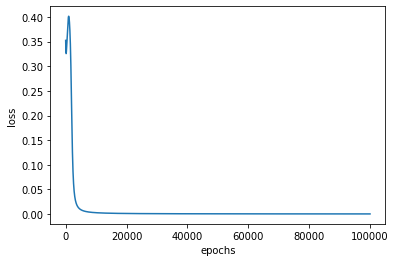

In [91]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [93]:
# Print out XOR outputs for an input matrix X
print(mlp.predict(X))

[[0.01240683]
 [0.99070411]
 [0.9907089 ]
 [0.01288546]]
